In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

# Henter data fra github
URL = 'https://raw.githubusercontent.com/LektorB/R2/refs/heads/main/fj%C3%A6rpendel.csv'

# Les dataene med Pandas
df = pd.read_csv(URL)
df.set_index('Time (s)', inplace=True)

In [2]:
#sjekker toppen av datarammen
df.head()

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
Time (s),,,,
0.000450,0.234712,-4.993167,0.413141,5.015724
0.010393,0.262105,-5.293891,0.425266,5.317409
0.020337,0.280816,-5.574258,0.437540,5.598451
0.030280,0.317490,-5.877079,0.450413,5.902857
0.040223,0.373324,-6.164930,0.477058,6.194620


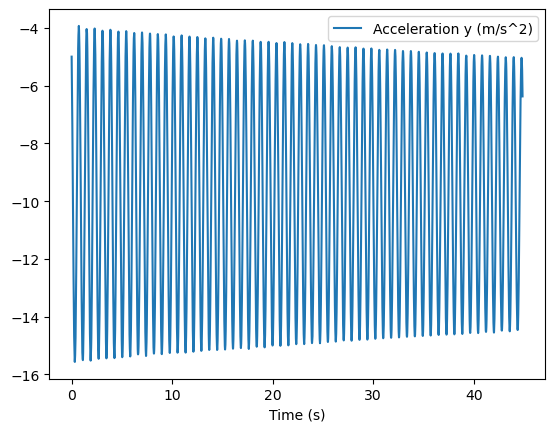

In [3]:
#plotter datasettet for akselerasjon i y-retning for å sjekke:
df['Acceleration y (m/s^2)'].plot(legend = True);

Siden jeg ikke hadde tilgang til datasettet direkte i Phypohox må jeg lage mitt eget interaktive plott. Det er lettest med plotly

Om du trenger Plotly kjør følgende kode i anaconda promt (PC) eller Terminalen (MAC)   
``` conda install -c plotly plotly```

In [4]:
#lager et interaktivt plot med plotly slik at jeg kan bygge en modell selv.
import plotly.express as px
px.line(df, y='Acceleration y (m/s^2)', title='Interaktivt plot med Plotly')


Modellen ser bra ut med første øyekast. 
Vi bør zoome inn og se litt nærmere på ti sekunder i starten og på slutten


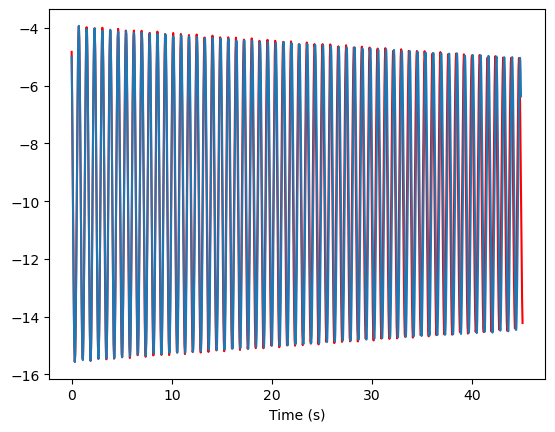

In [26]:
#Bruker pekeren til å lese av "lure punkter" og regner ut parameterene for hånd:
a = (-5.03388-(-3.9288))/(44.725-0.716) # stigningstall
b = -3.9288-a*0.716 #konstanledd fra ettpunktsformelen
p = (8.561614-0.716367)/10 #måler avstanden til 10 perioder
c = 2*np.pi/p 
fi = -c*0.5175 # finner x_0 og regner ut fi
d = (-3.9288+(-15.56688))/2

# Lager en en funksjon som har også parameterene som input
def f(x,a,b,c,fi,d):
    return (a*x+b-d)*np.sin(c*x+fi)+d

#legger parameterne inn i en liste siden vi trenger de siden:
p0 = [a,b,c,fi,d]
xverdier = np.linspace(0,45,1000)
yverdier = f(xverdier,*p0)

#Plotter håndlaget modell sammen med målinger
plt.plot(xverdier,yverdier,'r',label ='modell')
df['Acceleration y (m/s^2)'].plot();

print('Modellen ser bra ut med første øyekast. \nVi bør zoome inn og se litt nærmere på ti sekunder i starten og på slutten')

(0.0, 10.0)

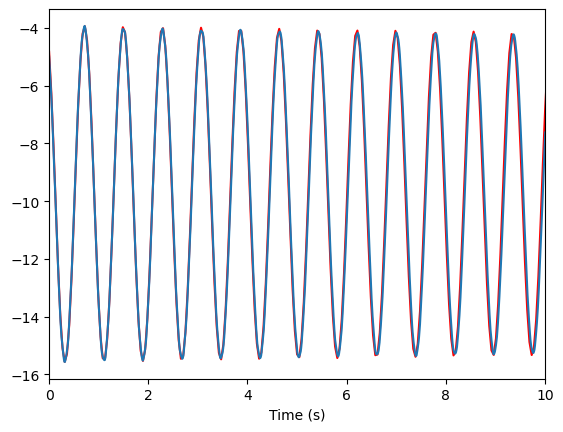

In [6]:
#sjekker modellen i starten
plt.plot(xverdier,yverdier,'r',label ='modell')
df['Acceleration y (m/s^2)'].plot()
plt.xlim(0,10)

Ser at modell og målinger driver fra hverandre


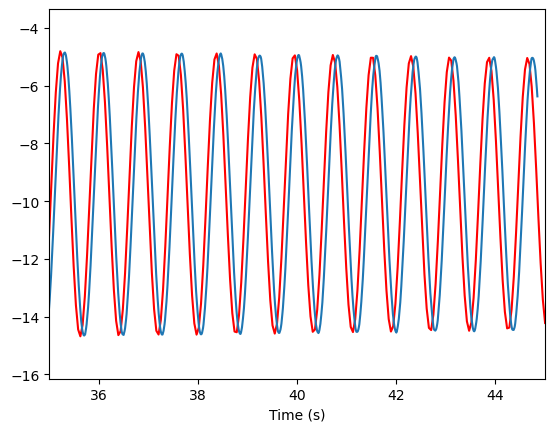

In [13]:
#sjekker modellen i slutten
plt.plot(xverdier,yverdier,'r',label ='modell')
df['Acceleration y (m/s^2)'].plot()
plt.xlim(35,45)

print('Ser at modell og målinger driver fra hverandre')

In [16]:
# Med utgangspunkt i modellen vi har laget 
# gjør vi en kurvetilpassing og ser om vi kan 
#forbedre modellen
popt,pcov = opt.curve_fit(f,df.index,df['Acceleration y (m/s^2)'],p0)

In [18]:
#sammenligner "håndlaget modell" mot kurvetilpassing
print(popt)
print(p0)
print('Ser at det er små endringer i alle koeffisientene')

[-0.02351467 -4.00798244  7.9902415  -4.12990098 -9.75056429]
[-0.025110318343975098, -3.9108210120657136, 8.0089069307564, -4.144609336666436, -9.74784]
Ser at det er små endringer i alle koeffisientene


<Axes: xlabel='Time (s)'>

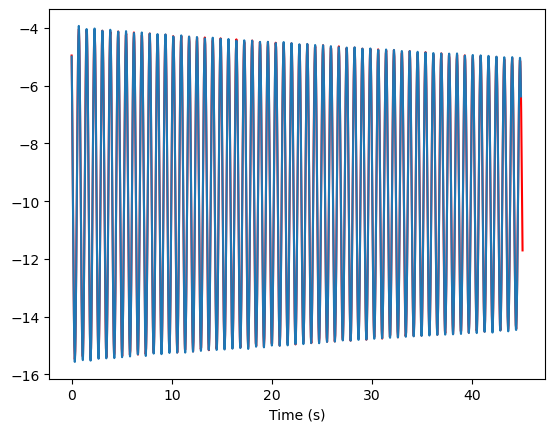

In [19]:
# regner ut nye yverdier og plotter 
nyverdier = f(xverdier,*popt)
plt.plot(xverdier,nyverdier,'r',label ='modell')
df['Acceleration y (m/s^2)'].plot()

Nå passer modellen bra både i starten og på slutten


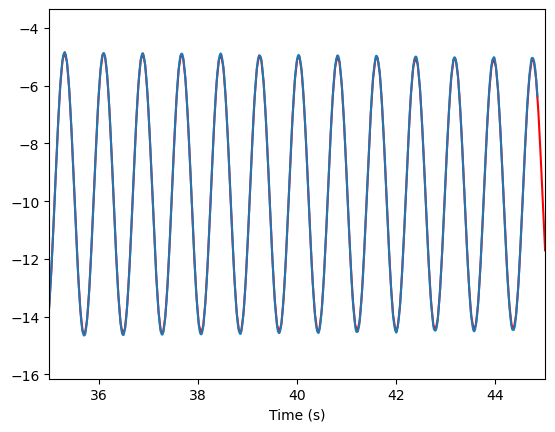

In [21]:
#sjekker modellen i slutten for å se om det passer bedre nå
plt.plot(xverdier,nyverdier,'r',label ='modell')
df['Acceleration y (m/s^2)'].plot()
plt.xlim(35,45);
print('Nå passer modellen bra både i starten og på slutten')